In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
df = pd.read_csv("user_behavior_dataset.csv")
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [3]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [4]:
for col in df.columns.to_list():
    print(f"'{col}' has {df[col].isna().sum()} NaNs.")

'User ID' has 0 NaNs.
'Device Model' has 0 NaNs.
'Operating System' has 0 NaNs.
'App Usage Time (min/day)' has 0 NaNs.
'Screen On Time (hours/day)' has 0 NaNs.
'Battery Drain (mAh/day)' has 0 NaNs.
'Number of Apps Installed' has 0 NaNs.
'Data Usage (MB/day)' has 0 NaNs.
'Age' has 0 NaNs.
'Gender' has 0 NaNs.
'User Behavior Class' has 0 NaNs.


In [5]:
'''Explore the number of users with each OS'''
users_by_os = df['Device Model'].value_counts().reset_index()
users_by_os

,Device Model,count
0,Xiaomi Mi 11,146
1,iPhone 12,146
2,Google Pixel 5,142
3,OnePlus 9,133
4,Samsung Galaxy S21,133


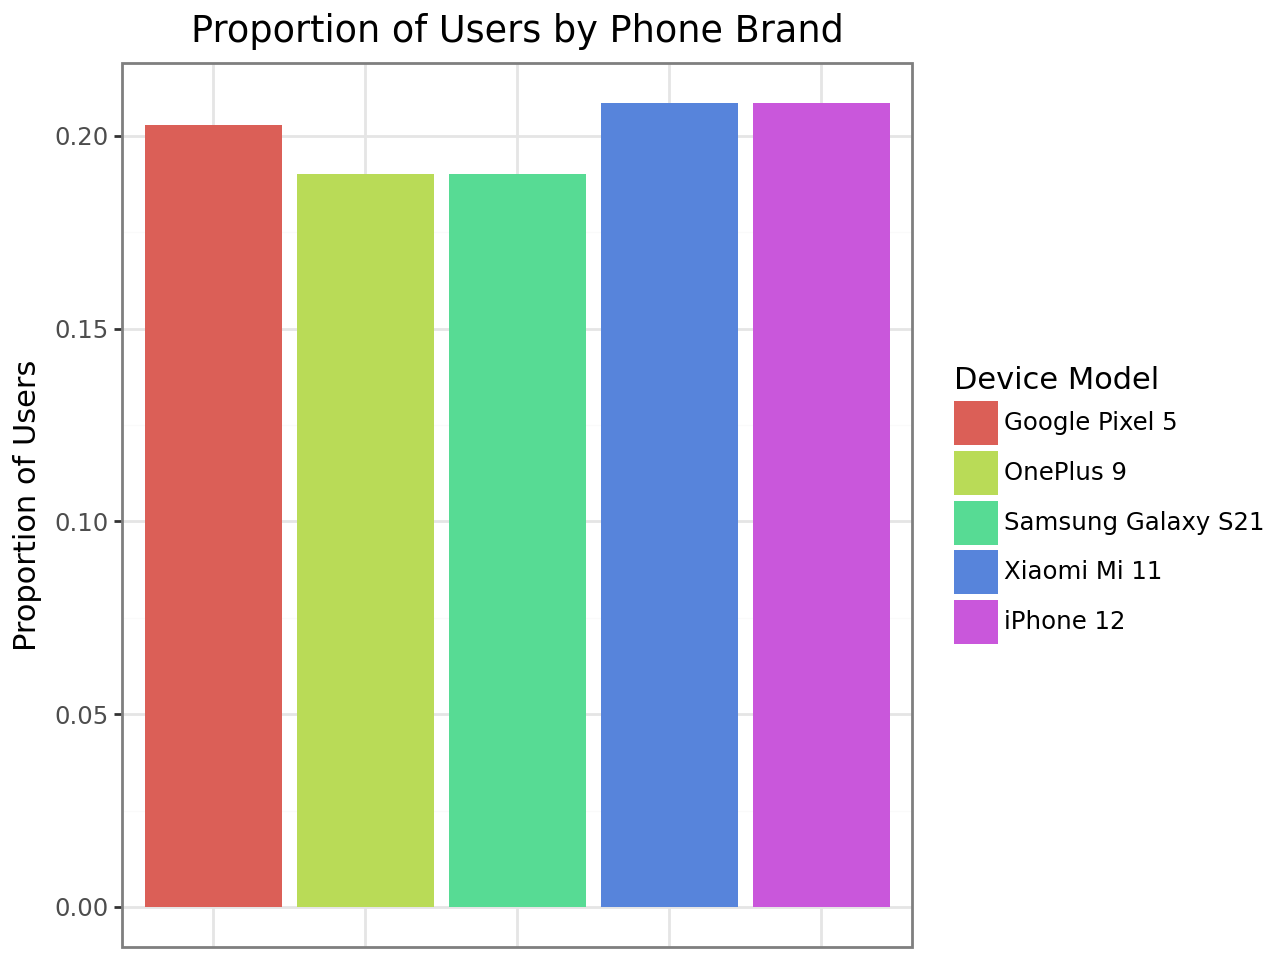

In [6]:
'''Explore the number of users with each phone type'''
brand_counts = df['Device Model'].value_counts(normalize=True).reset_index()
(
    ggplot(data = brand_counts, mapping = aes(x = "Device Model", y = "proportion", fill='Device Model')) +
    geom_bar(stat = "identity") +
    theme_bw() +
    labs(
        title = "Proportion of Users by Phone Brand",
        x = "",
        y = "Proportion of Users"
    ) +
    theme(
        axis_text_x=element_blank(),
        axis_ticks_major_x=element_blank()
    )
)

In [ ]:
# sanity check

iphones = df[df['Operating System'] == 'iOS']
iphone_brands = iphones['Device Model'].value_counts().reset_index().rename(columns={'count': 'iPhone count'})

androids = df[df['Operating System'] == 'Android']
android_brands = androids['Device Model'].value_counts().reset_index().rename(columns={'count': 'Android count'})

pd.merge(iphone_brands, android_brands, on='Device Model', how='outer')

,Device Model,iPhone count,Android count
0,Google Pixel 5,NaN,142.0
1,OnePlus 9,NaN,133.0
2,Samsung Galaxy S21,NaN,133.0
3,Xiaomi Mi 11,NaN,146.0
4,iPhone 12,146.0,NaN


In [31]:
def scatter_plot_value_color_coded(value: str, color_by: str):
    return sns.scatterplot(data = df, x = "User ID", y = value, hue = color_by, s = 25)

In [32]:
def plot_color_coded(value: str, color_by: str):
    scatter_plot_value_color_coded(value, color_by)
    plt.legend(
        title='Group',
        bbox_to_anchor=(1.05, 1),  # shift legend outside the plot
        loc='upper left',
        borderaxespad=0
    )
    plt.show()

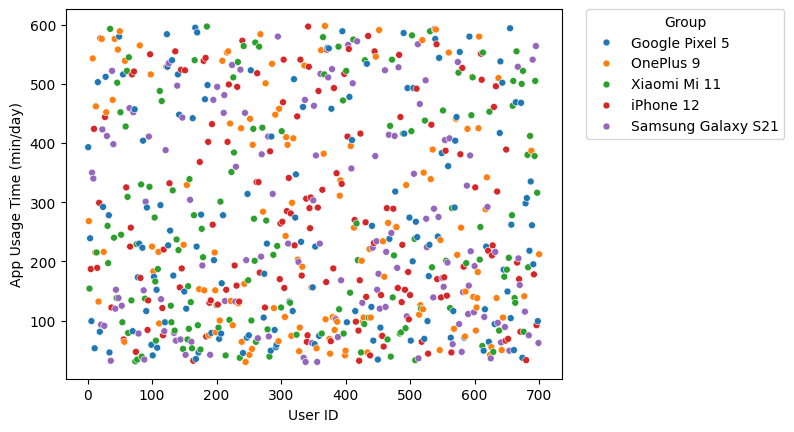

In [ ]:
plot_color_coded("App Usage Time (min/day)", "Device Model")

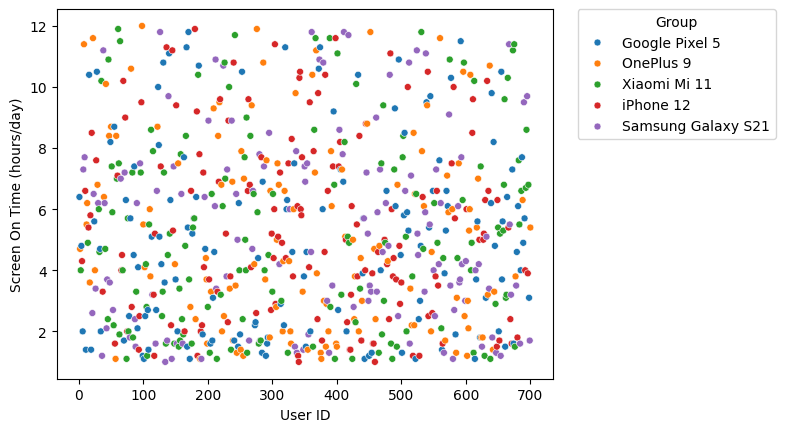

In [ ]:
plot_color_coded("Screen On Time (hours/day)", "Device Model")

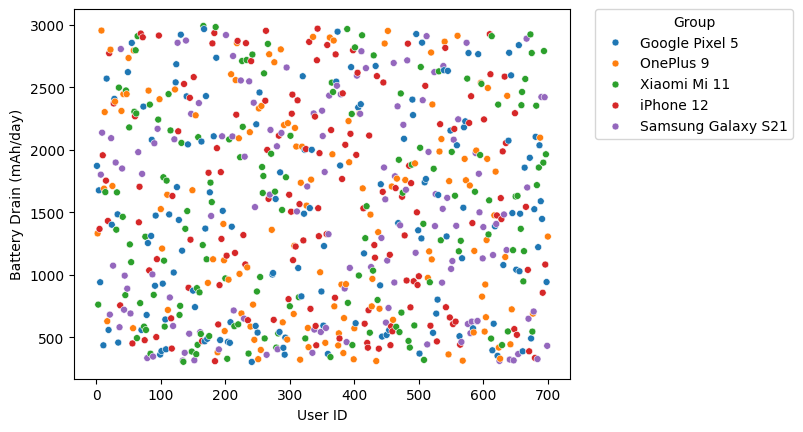

In [ ]:
plot_color_coded("Battery Drain (mAh/day)", "Device Model")

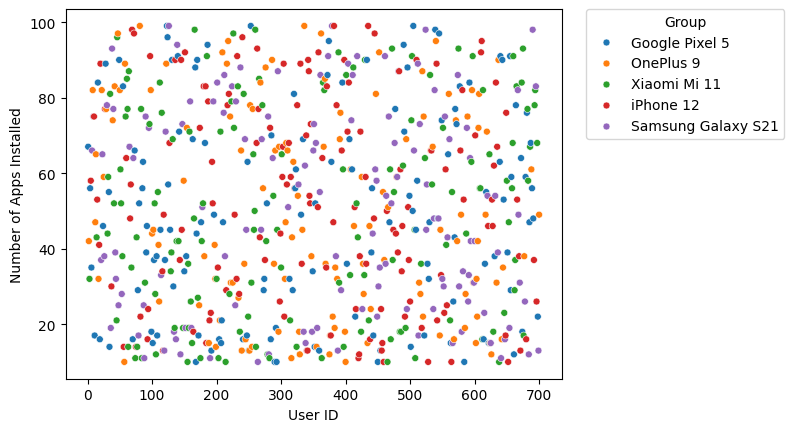

In [ ]:
plot_color_coded("Number of Apps Installed", "Device Model")

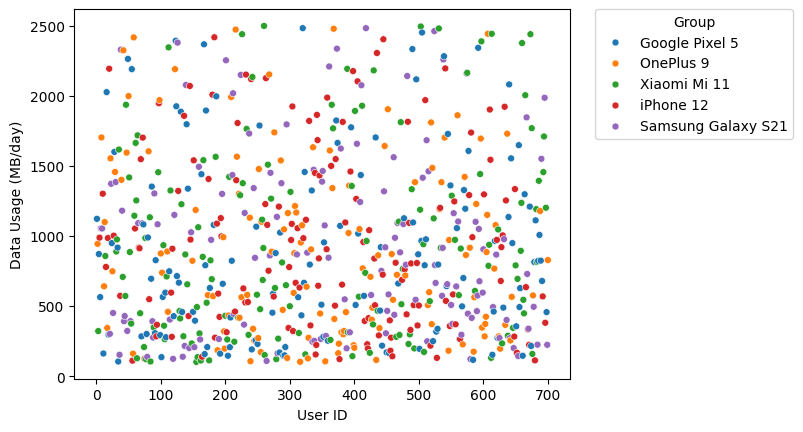

In [ ]:
plot_color_coded("Data Usage (MB/day)", "Device Model")

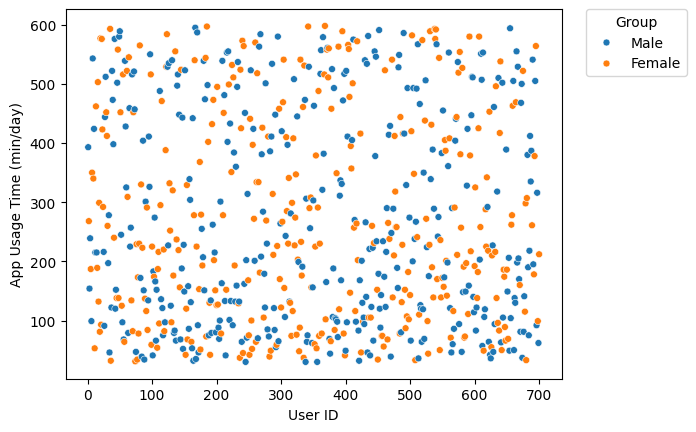

In [33]:
plot_color_coded("App Usage Time (min/day)", "Gender")

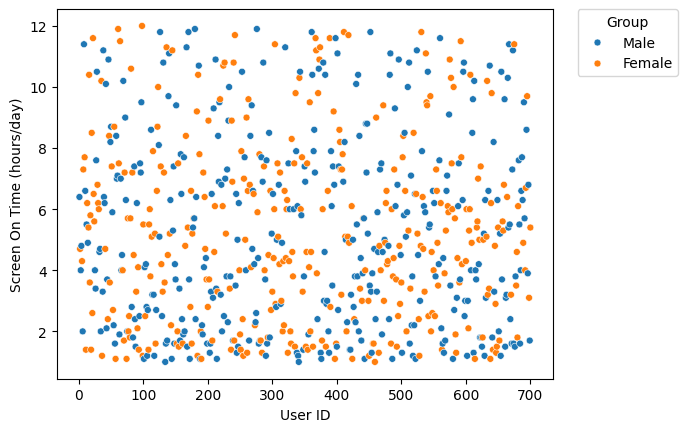

In [34]:
plot_color_coded("Screen On Time (hours/day)", "Gender")

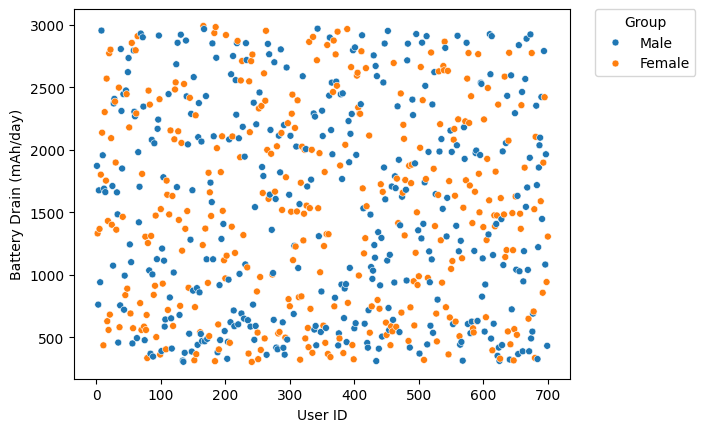

In [35]:
plot_color_coded("Battery Drain (mAh/day)", "Gender")